<a href="https://colab.research.google.com/github/MeghaBharti/AI-ML-Experiments-Demos/blob/main/GenAI/PyTorch/ann_fashion_mnist_pytorch_gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

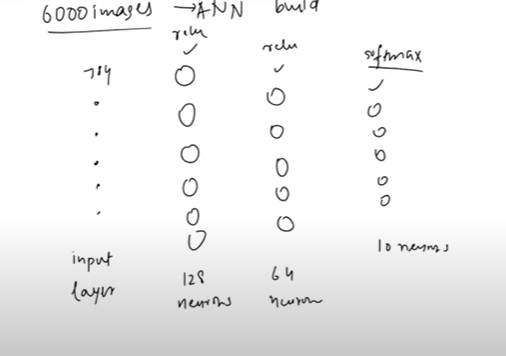

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [3]:
torch.manual_seed(42)

In [4]:
device =torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [5]:
df = pd.read_csv("fashion-mnist_train.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.shape

(60000, 785)

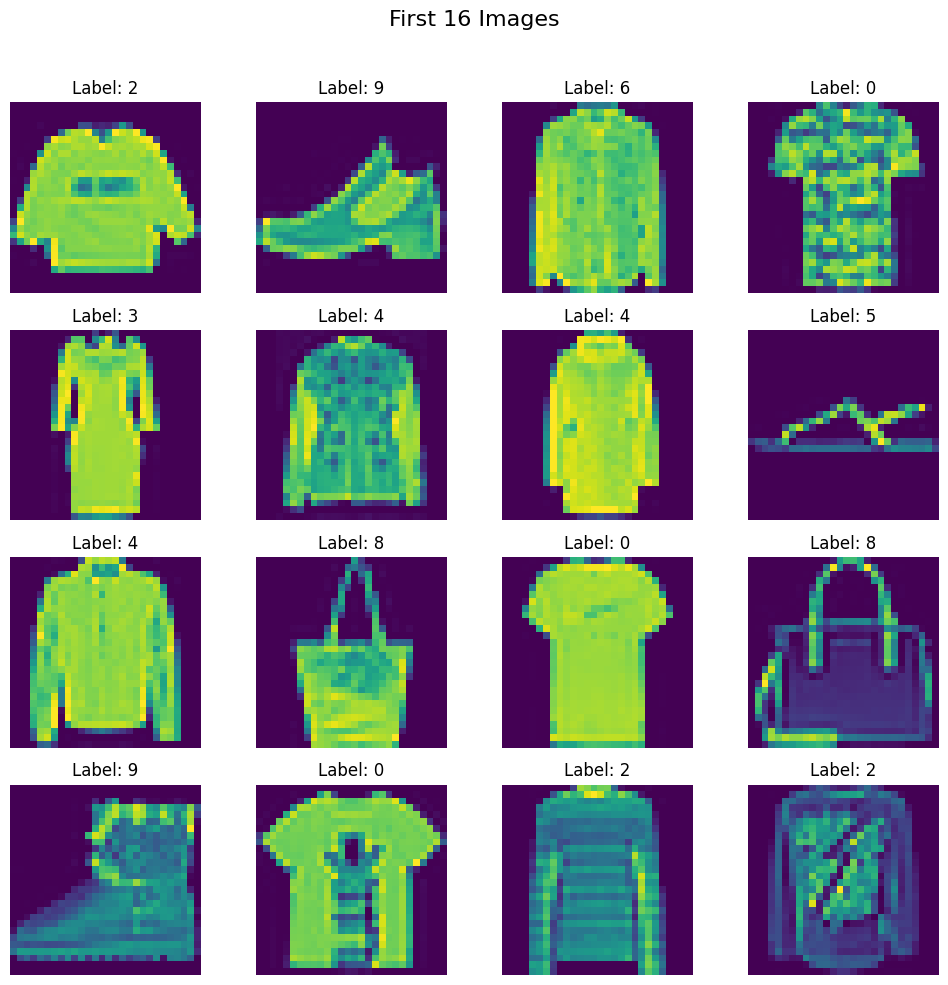

In [8]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


In [9]:
#train test split
X = df.iloc[:,1:].values
y= df.iloc[:,0].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [11]:
X_train
y_train

array([5, 7, 8, ..., 9, 4, 0])

In [12]:
#scaling the features
X_train = X_train/225.0
X_test = X_test/225.0

In [16]:
#create CustomDateset Class
class CustomDateset(Dataset):

  def __init__(self, features,labels) -> None:
     self.features = torch.tensor(features , dtype=torch.float32)
     self.labels = torch.tensor(labels,dtype=torch.long)

  def __len__(self):
    return len(self.features)
  def __getitem__(self, index):
     return self.features[index], self.labels[index]

In [17]:
#create train_dataset object
train_dataset = CustomDateset(X_train,y_train)

In [ ]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [23]:
# create test_dataset object
test_dataset = CustomDateset(X_test,y_test)
test_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [19]:
# create train and test loader
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader =DataLoader(test_dataset, batch_size=32,shuffle=False)


In [24]:
#define nn class

class MyNN(nn.Module):

  def __init__(self,num_features) -> None:
     super().__init__()
     self.model= nn.Sequential(
         nn.Linear(num_features,128),
         nn.ReLU(),
         nn.Linear(128,64),
         nn.ReLU(),
         nn.Linear(64,10)
         )

  def forward(self,x):
    return self.model(x)



In [25]:
#set learning rate and epochs
epochs= 100
learning_rate= 0.1

In [26]:
#initailise the model
model = MyNN(X_train.shape[1])
model= model.to(device)

#loss function
criterion = nn.CrossEntropyLoss()

#optimizer
optimizer = optim.SGD(model.parameters(),lr=learning_rate)

In [27]:
#training loop

for epoch in range(epochs):
  total_epoch_loss=0
  for batch_features , batch_labels in train_loader:

    #move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    #forward pass
    outputs= model(batch_features)

    #cal loss
    loss= criterion(outputs, batch_labels)

    #back prop
    optimizer.zero_grad()
    loss.backward()

    #update gradient
    optimizer.step()

    total_epoch_loss += loss.item()
  print(f'Epoch : {epoch + 1}  ,   Loss: {total_epoch_loss/len(train_loader)}')



Epoch : 1  ,   Loss: 0.6339363119006157
Epoch : 2  ,   Loss: 0.4277188332627217
Epoch : 3  ,   Loss: 0.38377357518672944
Epoch : 4  ,   Loss: 0.3550694544961055
Epoch : 5  ,   Loss: 0.3371263747935494
Epoch : 6  ,   Loss: 0.3198828190267086
Epoch : 7  ,   Loss: 0.3066996002321442
Epoch : 8  ,   Loss: 0.29432305916398765
Epoch : 9  ,   Loss: 0.28302460422739384
Epoch : 10  ,   Loss: 0.2748684805693726
Epoch : 11  ,   Loss: 0.2640629816701015
Epoch : 12  ,   Loss: 0.258322485268116
Epoch : 13  ,   Loss: 0.25111839642872413
Epoch : 14  ,   Loss: 0.24297043135638038
Epoch : 15  ,   Loss: 0.23775122967610757
Epoch : 16  ,   Loss: 0.23354359639560182
Epoch : 17  ,   Loss: 0.2253263563265403
Epoch : 18  ,   Loss: 0.21746181230122844
Epoch : 19  ,   Loss: 0.2152705330165724
Epoch : 20  ,   Loss: 0.21086274689932663
Epoch : 21  ,   Loss: 0.20390753585472704
Epoch : 22  ,   Loss: 0.19987979680423934
Epoch : 23  ,   Loss: 0.19871833577131232
Epoch : 24  ,   Loss: 0.19324050069414078
Epoch : 25  ,

In [28]:
#set code to eval mode
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [29]:
#eveluation code
total=0
correct=0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:

    #move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs,1)

    total += batch_labels.shape[0]

    correct += (predicted == batch_labels).sum().item()

print("Accuracy=",correct/total)


Accuracy= 0.8856666666666667
